In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from datetime import datetime


%matplotlib inline

In [2]:
keywords = ['Date','A','B','C','D','E','F','G','H','I','J','K','Count']

train = pd.read_csv("training_set.csv", header=None, delimiter = ";", names = keywords)
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
train.set_index('Date', inplace=True)

train.head()

,A,B,C,D,E,F,G,H,I,J,K,Count
Date,,,,,,,,,,,,
2009-01-05,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9
2009-01-12,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15
2009-01-19,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20
2009-01-26,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51
2009-02-02,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51


plt.rcParams['figure.figsize']=(20,10)
train.plot()


In [3]:
columns = train[train.columns[1:12]]
columns.head()


,B,C,D,E,F,G,H,I,J,K,Count
Date,,,,,,,,,,,
2009-01-05,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9
2009-01-12,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15
2009-01-19,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20
2009-01-26,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51
2009-02-02,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51


In [4]:
train['Total'] = columns.sum(axis=1,skipna=True)  # skipna : Exclude NA/null values when computing the result.
train.reset_index(inplace=True)
train['Total'].head()

0    179.0
1    152.0
2    167.0
3    220.0
4    221.0
Name: Total, dtype: float64

In [5]:
train = pd.concat([train['Date'], train['Total'], train['Count']], axis = 1)
train.set_index('Date', inplace=True)

train.head(50)


,Total,Count
Date,,
2009-01-05,179.0,9
2009-01-12,152.0,15
2009-01-19,167.0,20
2009-01-26,220.0,51
2009-02-02,221.0,51
2009-02-09,223.0,65
2009-02-16,185.0,37
2009-02-23,206.0,35
2009-03-02,140.0,22


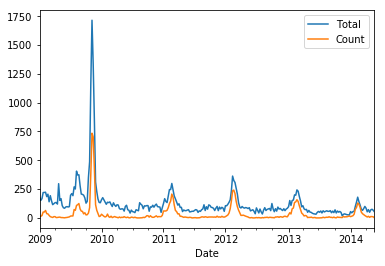

In [6]:
train.plot()